# Análise exploratória dos dados
_EDA - Exploratory Data Analysis_

---

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Análise dos dataframes**
4. **Análise exploratória dos dados**
   - 4.1. Quantidade de vendas por mês
   - 4.2. Quantidade de vendas e promoções diárias por mês
   - 4.3. Quantidade de vendas e consumidores por mês
   - 4.4. Quantidade de vendas anuais por modelo de loja
   - 4.5. Quantidade de vendas anuais por nível de sortimento
   - 4.6. Quantidade anual de consumidores
5. **Insights e recomendações**

<br>

---

<br>

## 1. Importação de bibliotecas

In [2]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
import gc

In [3]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar opção para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento das bases

In [4]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 0


In [5]:
# Criando um dataframe a partir do arquivo train.csv
df_train = pd.read_csv('dados/train.csv', sep=',')
print('\nDATAFRAME: df_train')
df_train.head()


DATAFRAME: df_train


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# Criando um dataframe a partir do arquivo test.csv
df_test = pd.read_csv('dados/test.csv', sep=',')
print('\nDATAFRAME: df_test')
df_test.head()


DATAFRAME: df_test


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
# Criando um dataframe a partir do arquivo store.csv
df_store = pd.read_csv('dados/store.csv', sep=',')
print('\nDATAFRAME: df_store')
df_store.head()


DATAFRAME: df_store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 3. Análise dos dataframes

In [8]:
# Exibindo a quantidade de linhas e colunas dos dataframes

# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_train': df_train,
    'df_test': df_test,
    'df_store': df_store
}

# Iteração sobre o dicionário para exibir o nome e as dimensões dos dataframes
print(f'\nVOLUMETRIA')
for nome, df in dfs.items():
    print(f'\n{nome}')
    print(f'-'*45)
    print(f'Quantidade de linhas (registros):  {df.shape[0]}')
    print(f'Quantidade de colunas (variáveis): {df.shape[1]}')    


VOLUMETRIA

df_train
---------------------------------------------
Quantidade de linhas (registros):  1017209
Quantidade de colunas (variáveis): 9

df_test
---------------------------------------------
Quantidade de linhas (registros):  41088
Quantidade de colunas (variáveis): 8

df_store
---------------------------------------------
Quantidade de linhas (registros):  1115
Quantidade de colunas (variáveis): 10


In [9]:
# Unindo df_train com df_store
df = pd.merge(df_train, df_store, on='Store', how='left')

# Exibindo o dataframe final resultante da junção
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# Função para geração de um dataframe de metadados

def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [11]:
# Exibindo os metadados do dataframe unificado

gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Promo2SinceWeek,float64,508031,49.94,24
1,PromoInterval,object,508031,49.94,3
2,Promo2SinceYear,float64,508031,49.94,7
3,CompetitionOpenSinceYear,float64,323348,31.79,23
4,CompetitionOpenSinceMonth,float64,323348,31.79,12
5,CompetitionDistance,float64,2642,0.26,654
6,DayOfWeek,int64,0,0.00,7
7,Store,int64,0,0.00,1115
8,Date,object,0,0.00,942
9,Sales,int64,0,0.00,21734


In [12]:
# Efetuando as conversões necessárias da tipagem dos dados

# Transforma para o tipo de dados datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year_Month'] = df['Date'].dt.strftime('%Y%m')
df['Year'] = df['Date'].dt.strftime('%Y')

## 4. Análise exploratória dos dados

In [13]:
# Função para simplificar a visualização de grandes números
def formatar_valores_(x, _):
    '''
    Recebe um número e retorna uma string com a representação simplificada do número.
    - B para bilhões
    - M para milhões
    - K para milhares
    
    :param x: int ou float
        O valor numérico que será formatado.
    :param _: Não utilizado
        Placeholder para uma segunda variável (geralmente usada em funções de formatação gráfica).
    :return: str
        O número formatado em string.
    ''' 
    if x >= 1e9:
        return f'{x / 1e9:.1f}B'  # Bilhão
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'  # Milhão
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'  # Milhar
    else:
        return str(int(x))  # Para números menores que mil


In [14]:
# Função para simplificar a visualização de grandes números
def formatar_valores(val):
    '''
    Recebe um número e retorna uma string com a representação simplificada do número.
    - B para bilhões
    - M para milhões
    - K para milhares
    
    :param val: int ou float
        O valor numérico que será formatado.
    :return: str
        O número formatado em string.
    '''       
    if val >= 1e9:
        return f'{val / 1e9:.1f}B'  # Bilhão
    elif val >= 1e6:
        return f'{val / 1e6:.1f}M'  # Milhão
    elif val >= 1e3:
        return f'{val / 1e3:.1f}K'  # Milhar
    else:
        return str(int(val))  # Para números menores que mil

### 4.1. Quantidade de vendas por mês

In [15]:
# Agrupando quantidade de vendas por mês
df_00 = df.groupby('Year_Month')['Sales'].sum().reset_index()

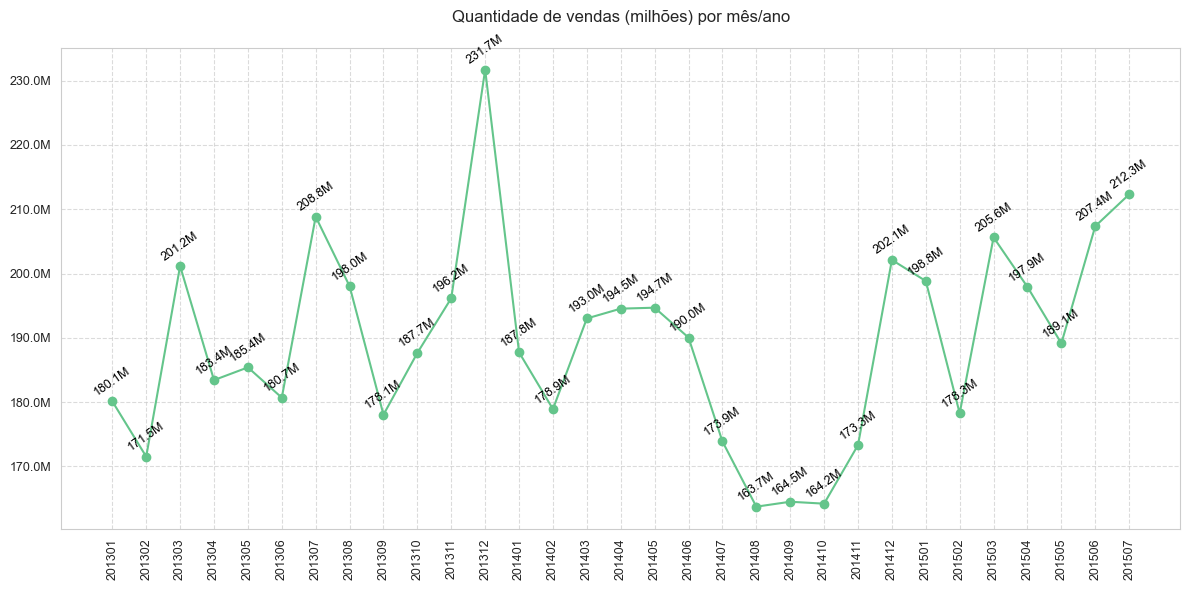

In [16]:
# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar o gráfico de linhas usando 'ax1'
ax1.plot(df_00['Year_Month'], df_00['Sales'], marker='o', color='#64c58b')

# Formatar os números do eixo Y para milhões
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90, ha='center', fontsize=9)
plt.yticks(fontsize=9)

# Título e formatação dos eixos
plt.title(f'Quantidade de vendas (milhões) por mês/ano\n', fontsize=12)
plt.xlabel('')
plt.ylabel('')

# Adicionar rótulos nos pontos do gráfico de linha
'''for x, y in zip(df_00['Year_Month'], df_00['Sales']):
    ax1.text(x, y, formatar_valores(y), color='black', 
             ha='center', va='bottom', fontsize=8, rotation=0)'''
    
# Adicionar rótulos nos pontos do gráfico de linha com maior espaçamento
for x, y in zip(df_00['Year_Month'], df_00['Sales']):
    ax1.text(x, y + 0.002 * max(df_00['Sales']),  # Aumentar o deslocamento aqui
             formatar_valores(y), color='black', 
             ha='center', va='bottom', fontsize=9, rotation=35)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


No ano de **2013**, foram observados três meses com maior faturamento: março, julho (férias escolares de verão) e dezembro. Esse foi também o ano com o maior faturamento registrado, totalizando aproximadamente **2,3 bilhões** em vendas. Em contrapartida, em **2014**, houve uma queda geral nas vendas, com os meses de agosto a outubro apresentando os menores faturamentos. Mesmo assim, o ano encerrou com aproximadamente **2,1 bilhões**. No entanto, no primeiro semestre de **2015**, já é possível notar indícios de recuperação no volume de vendas.

### 4.2. Quantidade de vendas e promoções diárias por mês

In [17]:
# Agrupando quantidade de vendas e promoções por mês
df_01 = df.groupby('Year_Month')[['Sales', 'Promo']].sum().reset_index()

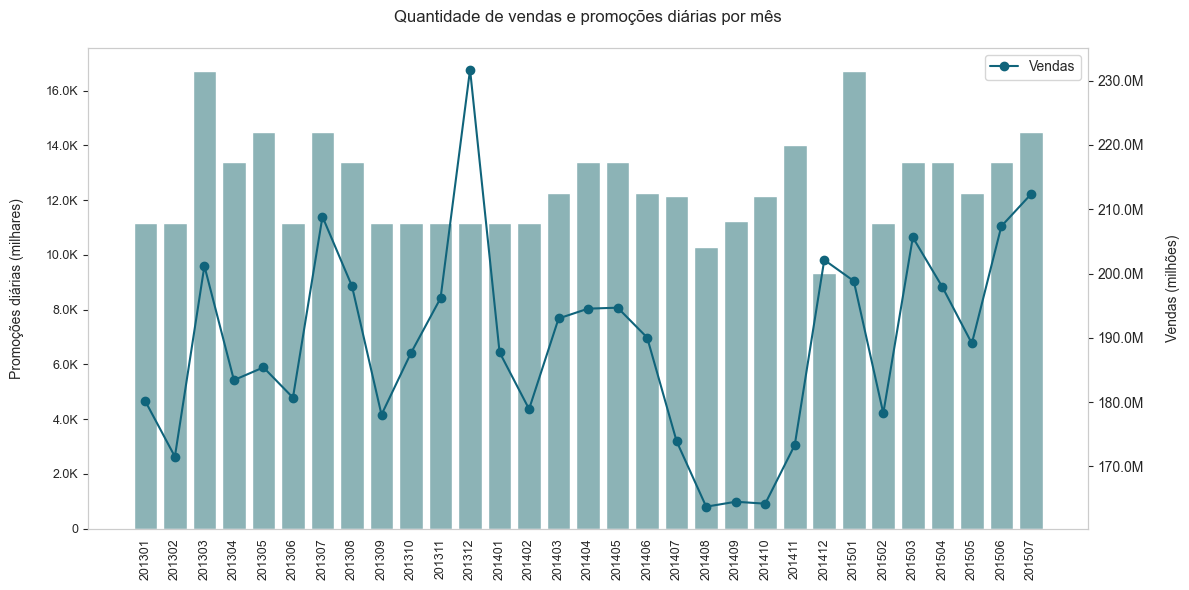

In [18]:
# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primeiro eixo y para 'Promo'
ax1.bar(df_01['Year_Month'], df_01['Promo'], color='#8cb3b6')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))
ax1.grid(False)
plt.xticks(rotation=90, ha='center', fontsize=9)
plt.yticks(fontsize=9)

# Segundo eixo y para 'Sales'
ax2 = ax1.twinx()
ax2.plot(df_01['Year_Month'], df_01['Sales'], marker='o', 
                   color='#10647b', label='Vendas')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))
ax2.grid(False)

# Título e formatação dos eixos
plt.title('Quantidade de vendas e promoções diárias por mês\n', fontsize=12)
plt.xlabel('')
ax1.set_ylabel('Promoções diárias (milhares)\n')
ax2.set_ylabel('\nVendas (milhões)')

# Adiciona a legenda para Sales (Vendas)
ax2.legend(loc='best')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

No ano de **2013**, a aplicação de promoções diárias coincidiu com um aumento no volume de vendas nos meses de março e julho. No entanto, em dezembro, que registrou o maior volume de vendas, a aplicação de promoções não parece ter influenciado os resultados. Em **2014**, o primeiro semestre apresentou um aumento tanto nas promoções quanto nas vendas. Porém, em agosto e dezembro, houve uma redução nas promoções, o que também resultou em uma diminuição no volume de vendas. Esse cenário de baixa começou a se alterar apenas em **2015**.

### 4.3. Quantidade de vendas e consumidores por mês

In [19]:
# Agrupando quantidade de vendas e consumidores por mês
df_03 = df.groupby('Year_Month').agg(
    Sales=('Sales', 'sum'),
    Customers=('Customers', 'sum')
).reset_index()

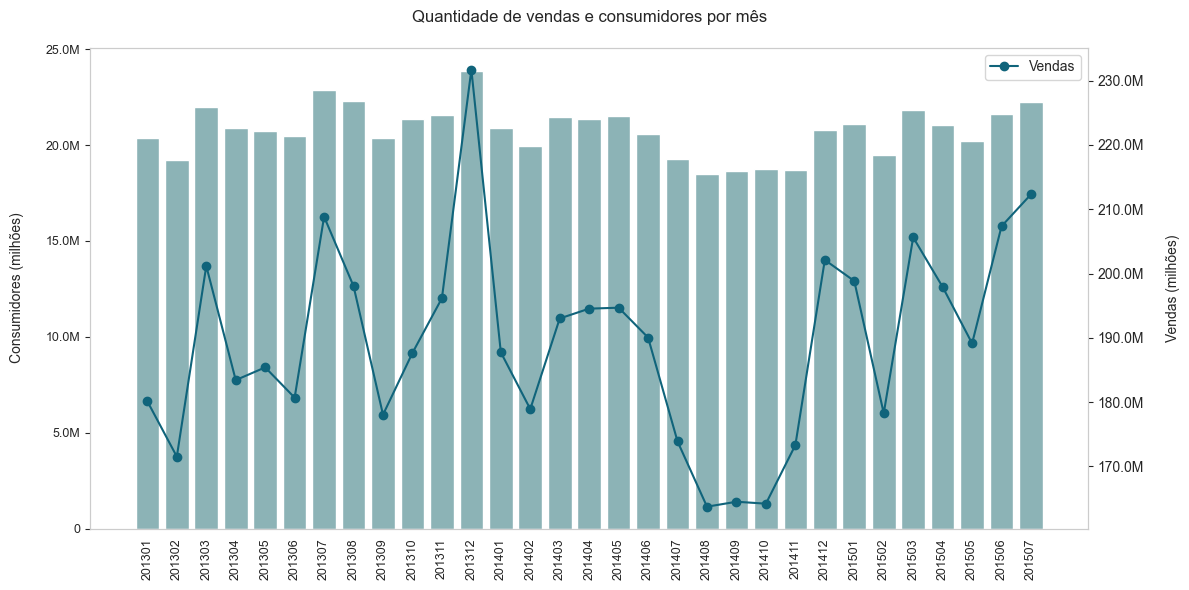

In [20]:
# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primeiro eixo y para 'Customers'
ax1.bar(df_03['Year_Month'], df_03['Customers'], color='#8cb3b6')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))
ax1.grid(False)
plt.xticks(rotation=90, ha='center', fontsize=9)
plt.yticks(fontsize=9)

# Segundo eixo y para 'Promo'
ax2 = ax1.twinx()
ax2.plot(df_03['Year_Month'], df_03['Sales'], marker='o', 
                   color='#10647b', label='Vendas')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))
ax2.grid(False)

# Título e formatação dos eixos
plt.title('Quantidade de vendas e consumidores por mês\n', fontsize=12)
plt.xlabel('')
ax1.set_ylabel('Consumidores (milhões)\n')
ax2.set_ylabel('\nVendas (milhões)')

# Adiciona a legenda para Sales (Vendas)
ax2.legend(loc='best')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Ao longo dos três anos, o volume de clientes se manteve acima de **18 milhões**. Em **dezembro de 2013**, registrou-se o maior volume de vendas e a maior concentração de consumidores, superando **231 milhões** em vendas e clientes. Em contrapartida, em **agosto de 2014**, observou-se o menor volume de vendas, com **163 milhões**, e o menor número de clientes, totalizando **18,5 milhões**.

### 4.4. Quantidade de vendas anuais por modelo de loja

In [21]:
# Agrupando quantidade de vendas anuais modelo de loja
df_02 = df.groupby(['Year','StoreType'])[['Sales']].sum().reset_index()

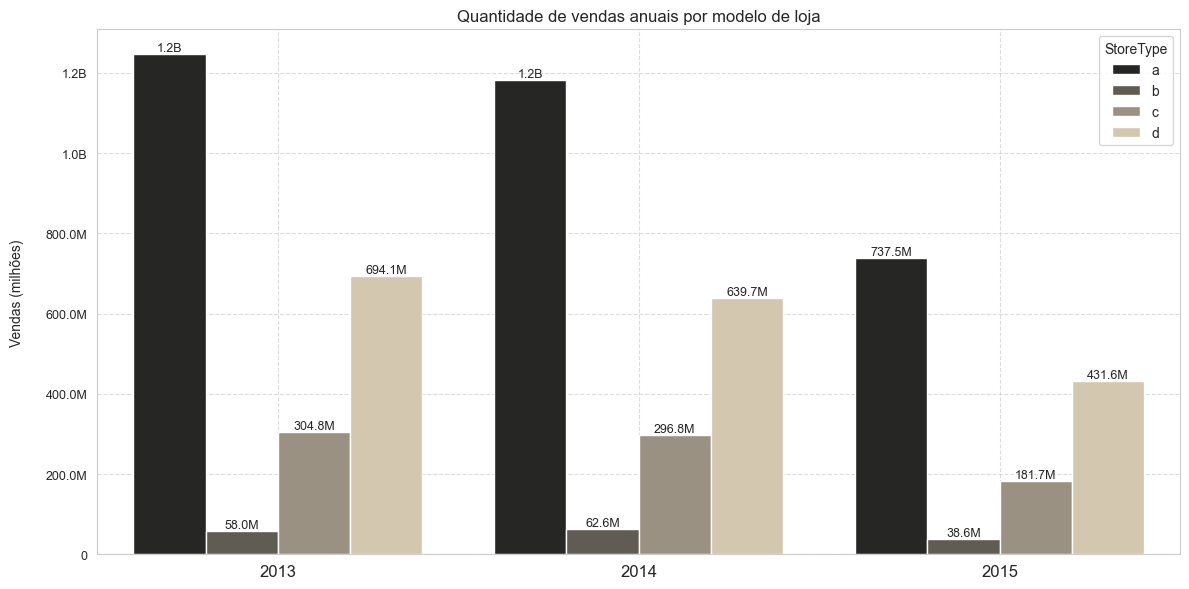

In [22]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Plotar o gráfico no eixo fornecido
ax = sns.barplot(data=df_02, x='Year', y='Sales', hue='StoreType', color='#dac8aa')

# Formatar os números do eixo Y para milhões ou milhares
ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))

# Formatar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
# Formatar os rótulos do eixo Y
ax.tick_params(axis='y', labelsize=9)

# Formatação do título
ax.set_title('Quantidade de vendas anuais por modelo de loja', loc='center', fontsize=12)
ax.set(xlabel='', ylabel='Vendas (milhões)\n')

# Adicionar rótulos (valores) nas barras, com a orientação especificada
for container in ax.containers:
    labels = [formatar_valores(val) for val in container.datavalues]
    ax.bar_label(container, labels=labels, size=9, label_type='edge')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

As drogarias são divididas em quatro modelos distintos. O modelo **a** é o que apresenta o maior volume de vendas, seguido pelos modelos **d**, **c** e **b**. Entre **2013** e **2014**, observa-se que apenas as lojas do modelo **b** registraram um aumento nas vendas, enquanto os demais modelos apresentaram queda. O ano de **2015**, que abrange o período de janeiro a julho, mostra um desempenho promissor, sugerindo a possibilidade de todos os modelos superarem os resultados de **2013** e **2014**.

### 4.5. Quantidade de vendas anuais por nível de sortimento

In [23]:
# Agrupando quantidade de vendas anuais por nível de sortimento
df_04 = df.groupby(['Year','Assortment'])[['Sales']].sum().reset_index()

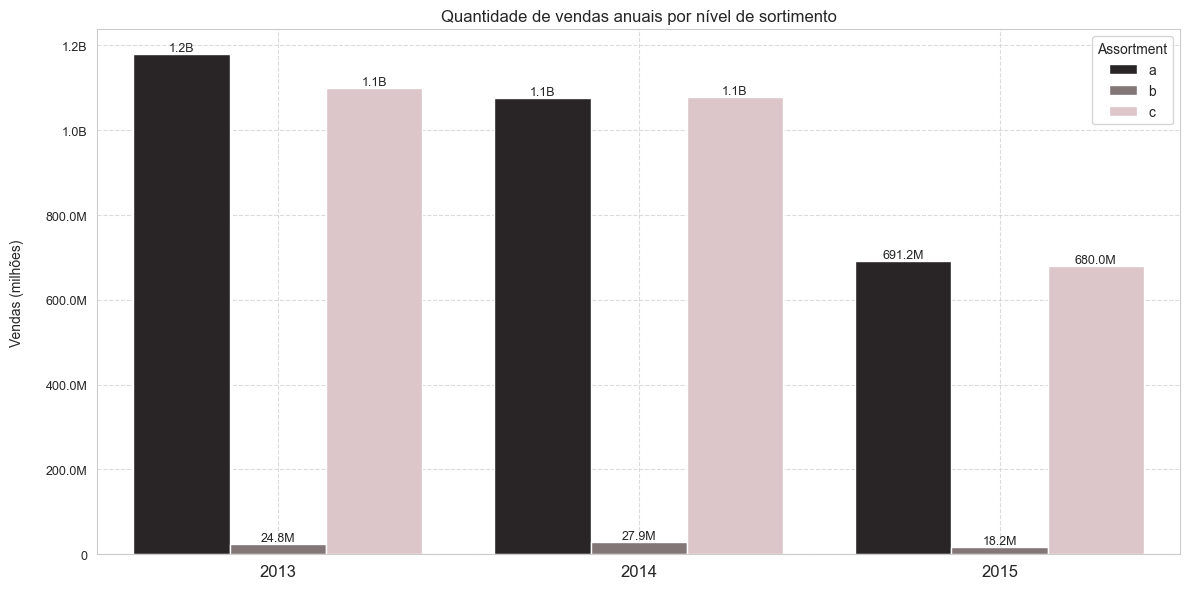

In [24]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Plotar o gráfico no eixo fornecido
ax = sns.barplot(data=df_04, x='Year', y='Sales', hue='Assortment', color='#e0c2c6')

# Formatar os números do eixo Y para milhões ou milhares
ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))

# Formatar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
# Formatar os rótulos do eixo Y
ax.tick_params(axis='y', labelsize=9)

# Formatação do título
ax.set_title('Quantidade de vendas anuais por nível de sortimento', loc='center', fontsize=12)
ax.set(xlabel='', ylabel='Vendas (milhões)\n')

# Adicionar rótulos (valores) nas barras, com a orientação especificada
for container in ax.containers:
    labels = [formatar_valores(val) for val in container.datavalues]
    ax.bar_label(container, labels=labels, size=9, label_type='edge')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

O nível de sortimento nas lojas é classificado da seguinte forma: **a** = básico, **b** = extra e **c** = estendido. As lojas com nível de sortimento **básico** apresentam os maiores volumes de vendas, seguidas de muito perto pelas lojas de nível **estendido**. Nos anos de **2013** e **2014**, as vendas superaram **1 bilhão** em ambos os níveis. No entanto, o nível **extra**, apesar de registrar o menor volume de vendas, com mais de **24 milhões**, foi o único que apresentou crescimento durante o período.

### 4.6. Quantidade anual de consumidores

In [25]:
# Agrupando quantidade anual de consumidores
df_05 = df.groupby(['Year'])['Customers'].sum().reset_index()

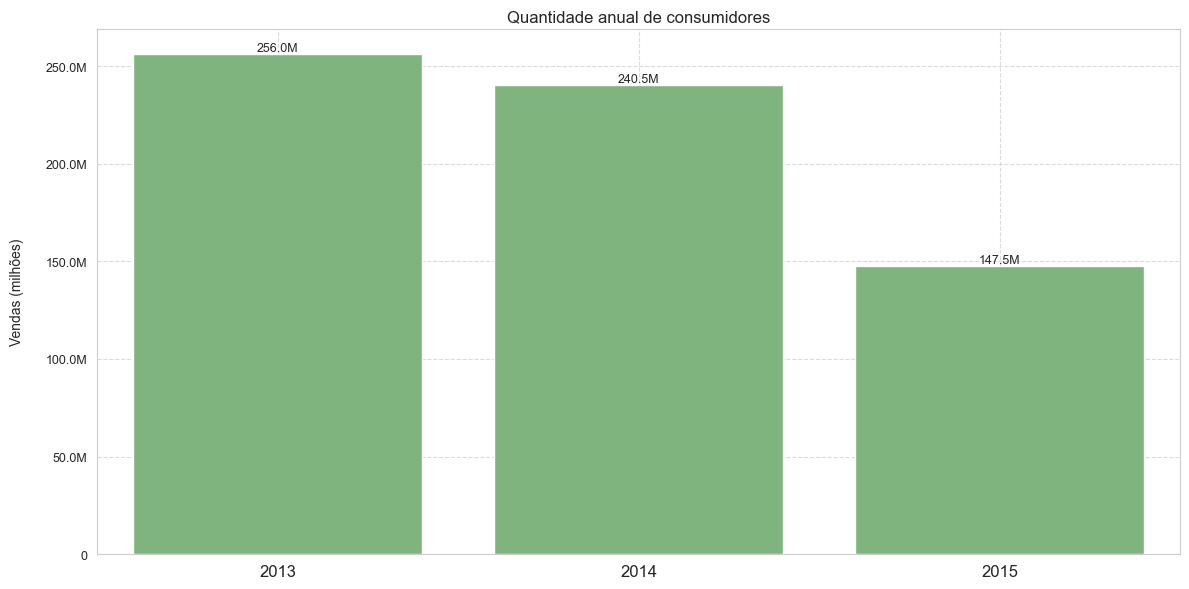

In [26]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Plotar o gráfico no eixo fornecido
ax = sns.barplot(data=df_05, x='Year', y='Customers', color='#78bd76')

# Formatar os números do eixo Y para milhões ou milhares
ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_valores_))

# Formatar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
# Formatar os rótulos do eixo Y
ax.tick_params(axis='y', labelsize=9)

# Formatação do título
ax.set_title('Quantidade anual de consumidores', loc='center', fontsize=12)
ax.set(xlabel='', ylabel='Vendas (milhões)\n')

# Adicionar rótulos (valores) nas barras, com a orientação especificada
for container in ax.containers:
    labels = [formatar_valores(val) for val in container.datavalues]
    ax.bar_label(container, labels=labels, size=9, label_type='edge')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

A quantidade de consumidores que passaram pelas drogarias entre **2013** e **2014** sofreu uma queda de aproximadamente **15,5 milhões**. Nos primeiros sete meses de **2015**, o volume de consumidores atingiu **147,5 milhões**, o que indica a possibilidade de superar os resultados de **2013** e **2014**.

## 5. Insights e recomendações

Com base na análise realizada, é possível extrair insights valiosos que podem não apenas aumentar as vendas, mas também minimizar perdas, mesmo na ausência de dados específicos. Abaixo estão algumas recomendações estratégicas que podem impulsionar os resultados:

1. **Intensificação de promoções em períodos de baixa demanda**: Implementar promoções mais frequentes nos meses com menor faturamento pode aumentar o fluxo de consumidores, resultando em crescimento nas vendas.

2. **Análise e otimização de campanhas promocionais**: Conduzir estudos detalhados e testes A/B para identificar quais tipos de promoções são mais eficazes pode ajudar a maximizar o retorno sobre o investimento em marketing.

3. **Segmentação e análise de perfil dos consumidores**: Compreender profundamente o perfil dos clientes – suas preferências, comportamentos de compra e sazonalidade – permite ajustar ofertas e melhorar a conversão de visitas em vendas.

4. **Gestão de estoque alinhada à demanda**: Ajustar o estoque com base em padrões sazonais, demanda específica de cada região e características locais de consumo, minimizando o excesso ou falta de produtos, contribui para uma operação mais eficiente.

5. **Desenvolvimento de um modelo preditivo de vendas**: Implementar um modelo de previsão de vendas pode fornecer insights acionáveis, permitindo decisões mais embasadas sobre estoque, promoções e alocação de recursos.

Essas recomendações podem ter um impacto significativo no aumento do faturamento, atração de novos clientes e otimização de custos operacionais, garantindo uma gestão mais estratégica e eficiente.